In [1]:
import pandas as pd
import numpy as np
import datetime

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
csv_file = pd.read_csv('./train_sample.csv')

In [3]:
csv_file.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [4]:
X = csv_file[['ip', 'app', 'os', 'channel']]
X[0:5]

,ip,app,os,channel
0,87540,12,13,497
1,105560,25,17,259
2,101424,12,19,212
3,94584,13,13,477
4,68413,12,1,178


In [5]:
Y = csv_file[['device']].values.ravel()
Y

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
pre = csv_file.iloc[[2]][['ip', 'app', 'os', 'channel']]
pre

,ip,app,os,channel
2,101424,12,19,212


### KNN

In [7]:
knn = KNeighborsClassifier(n_neighbors=6)

In [8]:
knn.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [9]:
result = knn.predict(pre)
print(result)

[1]


### Linear Regression

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
print(regr.predict(pre))

[5.90634187]


### Support vector machines

In [12]:
svc = svm.SVC(kernel='linear')

In [13]:
X_fast = X[:100]
X_fast[0:5]

,ip,app,os,channel
0,87540,12,13,497
1,105560,25,17,259
2,101424,12,19,212
3,94584,13,13,477
4,68413,12,1,178


In [14]:
Y_fast = Y[:100]
Y_fast[0:5]

array([1, 1, 1, 1, 1])

In [15]:
svc.fit(X_fast, Y_fast) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
print(svc.predict(pre))

[1]


### Stochastic Gradient Descent

In [17]:
clf = SGDClassifier(loss="hinge", penalty="l2")

In [18]:
clf.fit(X, Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [19]:
print(clf.predict(pre))

[1]


##### Which hyper-parameters are important?

In KNN, n_neighbors is important <br>
In SGD, penalty and loss

##### What hyper-parameter values work best? 

In KNN, n_neighbors = 6<br>
In SGD, penalty = 12, loss = "hinge" which gives a linear SVM

##### Which supervised learner works best on the test data?  

KNN is the fastest and the most accurate learner. Other learner work slower than it. I even have to reduce the number of the training data to fit SVM. Linear Regression cannot predict correctly.

# Part B

In [20]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')
 
# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

In [21]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


In [22]:
import pandas as pd

df_train= pd.read_csv('./train.csv') #train data subset, original too large
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
ip                 200000 non-null int64
app                200000 non-null int64
device             200000 non-null int64
os                 200000 non-null int64
channel            200000 non-null int64
click_time         200000 non-null object
attributed_time    348 non-null object
is_attributed      200000 non-null int64
dtypes: int64(6), object(2)
memory usage: 12.2+ MB


In [23]:
df_train.head(20)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


In [24]:
df_train["is_attributed"].value_counts()

0    199652
1       348
Name: is_attributed, dtype: int64

In [25]:
import pandas as pd
df_test= pd.read_csv('./train.csv', nrows=200000,skiprows=range(1, 400000)) #train data subset, original too large


df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
ip                 200000 non-null int64
app                200000 non-null int64
device             200000 non-null int64
os                 200000 non-null int64
channel            200000 non-null int64
click_time         200000 non-null object
attributed_time    356 non-null object
is_attributed      200000 non-null int64
dtypes: int64(6), object(2)
memory usage: 12.2+ MB


In [26]:
df_test.head(20)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,115115,8,1,13,145,2017-11-06 16:07:47,NaN,0
1,21633,1,1,19,178,2017-11-06 16:07:47,NaN,0
2,144498,12,1,17,178,2017-11-06 16:07:47,NaN,0
3,76919,2,1,6,237,2017-11-06 16:07:47,NaN,0
4,1556,15,1,13,245,2017-11-06 16:07:47,NaN,0
5,67467,15,1,37,245,2017-11-06 16:07:47,NaN,0
6,20266,64,1,19,459,2017-11-06 16:07:47,NaN,0
7,31564,15,1,19,265,2017-11-06 16:07:47,NaN,0
8,1732,9,1,13,134,2017-11-06 16:07:47,NaN,0
9,111114,15,1,13,245,2017-11-06 16:07:47,NaN,0


In [27]:
df_test["is_attributed"].value_counts()

0    199644
1       356
Name: is_attributed, dtype: int64

In [28]:
X_train = df_train.loc[:,["ip","app","device","os","channel"]]
X_test = df_test.loc[:,["ip","app","device","os","channel"]]

In [29]:
X_train=X_train.values
X_test= X_test.values

In [30]:
X_train.shape

(200000, 5)

In [31]:
X_test.shape

(200000, 5)

In [32]:
X_train[0]

array([83230,     3,     1,    13,   379])

In [33]:
X_test[0]

array([115115,      8,      1,     13,    145])

In [34]:
y_train = df_train["is_attributed"]

In [35]:
y_train = y_train.values

In [36]:
y_test =df_test["is_attributed"]

In [37]:
y_test= y_test.values

In [38]:
n_classes = 2
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [39]:
y_train[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [40]:
def shallow_net_A(n=55,i=5,o=2):
    # create simple one dense layer net
    # default 55 neurons, input 5, output 2
    net = Sequential()
    net.add(Dense(n, activation='sigmoid', input_shape=(i,)))
    net.add(Dense(2, activation='softmax'))
    # Compile net
    net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return net

In [41]:
nn=shallow_net_A()

In [42]:
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 55)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 112       
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


In [43]:
X_train[0]

array([83230,     3,     1,    13,   379])

In [44]:
nn.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_train, y_train))

Train on 200000 samples, validate on 200000 samples
Epoch 1/99
200000/200000 [==============================] - 3s 13us/step - loss: 0.0034 - acc: 0.9982 - val_loss: 0.0020 - val_acc: 0.9983
Epoch 2/99
200000/200000 [==============================] - 2s 11us/step - loss: 0.0019 - acc: 0.9983 - val_loss: 0.0019 - val_acc: 0.9983
Epoch 3/99
200000/200000 [==============================] - 2s 11us/step - loss: 0.0018 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9983
Epoch 4/99
200000/200000 [==============================] - 3s 13us/step - loss: 0.0018 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9983
Epoch 5/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.0018 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9983
Epoch 6/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.0018 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9983
Epoch 7/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.0018 - acc: 0.9983 - val_loss: 

In [45]:
# 99.83% accuracy after 99 epochs
nn.evaluate(X_test,y_test)

200000/200000 [==============================] - 2s 10us/step


[0.001778513824111069, 0.99822]

In [46]:
# 99.82% accuracy after another 99 epochs
nn.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 200000 samples, validate on 200000 samples
Epoch 1/99
200000/200000 [==============================] - 2s 9us/step - loss: 0.0017 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9982
Epoch 2/99
200000/200000 [==============================] - 2s 9us/step - loss: 0.0017 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9982
Epoch 3/99
200000/200000 [==============================] - 2s 9us/step - loss: 0.0017 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9982
Epoch 4/99
200000/200000 [==============================] - 2s 9us/step - loss: 0.0017 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9982
Epoch 5/99
200000/200000 [==============================] - 2s 9us/step - loss: 0.0017 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9982
Epoch 6/99
200000/200000 [==============================] - 2s 9us/step - loss: 0.0017 - acc: 0.9983 - val_loss: 0.0018 - val_acc: 0.9982
Epoch 7/99
200000/200000 [==============================] - 2s 9us/step - loss: 0.0017 - acc: 0.9983 - val_loss: 0.0018 

In [47]:
def shallow_net_B(n=55,i=5,o=2):
    # create simple one dense layer net
    # default 55 neurons, input 5, output 2
    # Using relu
    net = Sequential()
    net.add(Dense(n, activation='relu', input_shape=(i,)))
    net.add(Dense(2, activation='softmax'))
    # Compile net
    net.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return net

In [48]:
nn2=shallow_net_B()
nn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 55)                330       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 112       
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


In [49]:
nn2.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 200000 samples, validate on 200000 samples
Epoch 1/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 2/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 3/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 4/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 5/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 6/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 7/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 

In [50]:
# 99.82% accuracy after another 99 epochs
nn.evaluate(X_test, y_test)

200000/200000 [==============================] - 3s 15us/step


[0.0017778565070444528, 0.99822]

In [51]:
nn2.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 200000 samples, validate on 200000 samples
Epoch 1/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 2/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 3/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 4/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 5/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 6/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 0.9982 - val_acc: 0.0018
Epoch 7/99
200000/200000 [==============================] - 3s 14us/step - loss: 0.9983 - acc: 0.0017 - val_loss: 

In [52]:
# 99.82% accuracy after another 99 epochs with Relu
# Seems to be a plateau
nn2.evaluate(X_test, y_test)

200000/200000 [==============================] - 3s 16us/step


[0.99822, 0.00178]

In [53]:
def shallow_net_C(n=55,i=5,o=2):
    # create simple one dense layer net
    # default 55 neurons, input 5, output 2
    # Using relu and 
    net = Sequential()
    net.add(Dense(n, activation='relu', input_shape=(i,)))
    net.add(Dense(2, activation='softmax'))
    # Compile net
    net.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01), metrics=['accuracy'])
    return net

In [54]:
nn3=shallow_net_C()
nn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 55)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 112       
Total params: 442
Trainable params: 442
Non-trainable params: 0
_________________________________________________________________


In [55]:
nn3.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 200000 samples, validate on 200000 samples
Epoch 1/99
200000/200000 [==============================] - 3s 17us/step - loss: 0.5723 - acc: 0.9645 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 2/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 3/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 4/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 5/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 6/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 7/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 

In [56]:
# 99.81% accuracy after first 99 epochs with Relu and Cross-entropy
nn3.evaluate(X_test, y_test)

200000/200000 [==============================] - 3s 17us/step


[0.028690325632095337, 0.99822]

In [57]:
nn3.fit(X_train, y_train, batch_size=128, epochs=99, verbose=1, validation_data=(X_test, y_test))

Train on 200000 samples, validate on 200000 samples
Epoch 1/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 2/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 3/99
200000/200000 [==============================] - 3s 15us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 4/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 5/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 6/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 0.0287 - val_acc: 0.9982
Epoch 7/99
200000/200000 [==============================] - 3s 16us/step - loss: 0.0280 - acc: 0.9983 - val_loss: 

In [58]:
# 99.81% accuracy after first 99 epochs with Relu and Cross-entropy
nn3.evaluate(X_test, y_test)

200000/200000 [==============================] - 2s 12us/step


[0.028690325632095337, 0.99822]

### With a fairly simple shallow net we've done fairly well classifying (99.82% accuracy after another 99 epochs with Shallow Neural Network, and 99.81% accuracy with Relu and Cross-entropy) on the TalkingData whether is-attributed classification problem.

* Which hyper-parameters are important?
Input, output, bactch-size, epochs, verbose are important.
In addition, CNN: number of layers, number of units at each layer, ReLu,and Cross-entropy
are important as well.
* What hyper-parameter values work best? 
In Shallow neural network, 55 neurons, input:5, output:2, batch_size: 128, epochs:99, verbose:1
work best. 
* How the neural network compare to the supervised learners in part A?
Neural network is proficient to give the better classification by sing non linear boundaries. In addition it is even easy to overcome overfitting by some regularizer settings. In addition, there are lots of things ML stuffs that NN might be a solution. 
However, it takes long time to be trained well relative to other methods like Decision Tree.

# Part C

In [59]:
from sklearn import model_selection
from sklearn import svm
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

### Simple Stacked Classification

In [60]:
knn = KNeighborsClassifier(n_neighbors=6)
rf = RandomForestClassifier(random_state=6)
gau = GaussianNB()
lr = LogisticRegression()

sckf = StackingClassifier(classifiers=[knn, rf, gau], 
                          meta_classifier=lr)

X = csv_file[['ip', 'app', 'os', 'channel']][:200]
y = csv_file[['device']].values.ravel()[:200]

print('10-fold cross validation:\n')
for clf, label in zip([knn, rf, gau, sckf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'SVC'
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.95 (+/- 0.00) [KNN]
Accuracy: 0.95 (+/- 0.02) [Random Forest]
Accuracy: 0.93 (+/- 0.04) [Naive Bayes]
Accuracy: 0.95 (+/- 0.00) [SVCStackingClassifier]


In [63]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
X = np.asarray(X)

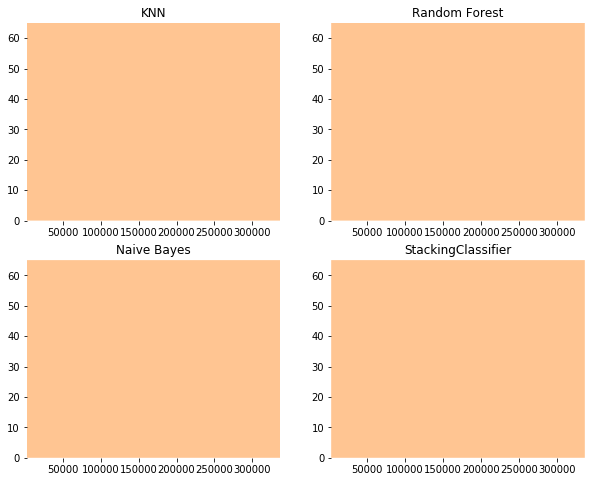

In [64]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([knn, rf, gau, sckf], 
                         ['KNN', 
                          'Random Forest', 
                          'Naive Bayes',
                          'StackingClassifier'],
                          itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, filler_feature_values={2: 1, 3 : 1.5})
    plt.title(lab)

### Using Probabilities as Meta-Features

In [66]:
knn = KNeighborsClassifier(n_neighbors=6)
rf = RandomForestClassifier(random_state=6)
gau = GaussianNB()
lr = LogisticRegression()

sckf = StackingClassifier(classifiers=[knn, rf, gau], 
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)

print('10-fold cross validation:\n')
for clf, label in zip([knn, rf, gau, sckf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'SVC'
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=10)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 0.95 (+/- 0.00) [KNN]
Accuracy: 0.95 (+/- 0.02) [Random Forest]
Accuracy: 0.93 (+/- 0.04) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [SVCStackingClassifier]


### Stacked Classification and GridSearch

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
knn = KNeighborsClassifier(n_neighbors=6)
rf = RandomForestClassifier(random_state=6)
gau = GaussianNB()
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[knn, rf, gau], 
                          meta_classifier=lr)

params = {'kneighborsclassifier__n_neighbors': [1, 5],
          'randomforestclassifier__n_estimators': [10, 50],
          'meta-logisticregression__C': [0.1, 10.0]}

grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

0.950 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1}
0.950 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'randomforestclassifier__n_estimators': 50, 'meta-logisticregression__C': 0.1}
0.925 +/- 0.01 {'kneighborsclassifier__n_neighbors': 1, 'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 10.0}
0.950 +/- 0.00 {'kneighborsclassifier__n_neighbors': 1, 'randomforestclassifier__n_estimators': 50, 'meta-logisticregression__C': 10.0}
0.950 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 0.1}
0.950 +/- 0.00 {'kneighborsclassifier__n_neighbors': 5, 'randomforestclassifier__n_estimators': 50, 'meta-logisticregression__C': 0.1}
0.950 +/- 0.01 {'kneighborsclassifier__n_neighbors': 5, 'randomforestclassifier__n_estimators': 10, 'meta-logisticregression__C': 10.0}
0.945 +/- 0.01 {'kneighborsclassifier__n_neighbors':

### Stacking of Classifiers that Operate on Different Feature Subsets

In [69]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline

In [70]:
pipe1 = make_pipeline(ColumnSelector(cols=(0, 2)),
                      LogisticRegression())
pipe2 = make_pipeline(ColumnSelector(cols=(1, 2, 3)),
                      LogisticRegression())

sclf = StackingClassifier(classifiers=[pipe1, pipe2], 
                          meta_classifier=LogisticRegression())

sclf.fit(X, y)

StackingClassifier(average_probas=False,
          classifiers=[Pipeline(memory=None,
     steps=[('columnselector', ColumnSelector(cols=(0, 2), drop_axis=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          pen...='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=False, verbose=0)

## Did the stacked ensemble super-model help?
    Yes. The ensemble methods successfully boost predictive accuracy by combining the predictions of multiple machine learning models. As an efficient ensemble method, its predictions, generated by using various machine learning algorithms, are used as inputs in a second-layer learning algorithm. This second-layer algorithm is trained to optimally combine the model predictions to form a new set of predictions.

## Answer the following questions for the stacked ensemble super-model:
1. How did to combine the models?
       Stacking combine multiple classification models via a meta-classifier as an ensemble learning technique. The individual classification models are trained based on the complete training set; then, the meta-classifier is fitted based on the outputs -- meta-features -- of the individual classification models in the ensemble. The meta-classifier can either be trained on the predicted class labels or probabilities from the ensemble.
       As an efficient ensemble method, its predictions, generated by using various machine learning algorithms, are used as inputs in a second-layer learning algorithm. This second-layer algorithm is trained to optimally combine the model predictions to form a new set of predictions.
2. Cross-validate the model. How well did it do?
       All observations are used for both training and validation, and each observation is used for validation exactly once. In repeated cross-validation, the cross-validation procedure is repeated n times, yielding n random partitions of the original sample. The n results are again averaged (or otherwise combined) to produce a single estimation. It tells you generically how good the algorithm you chose will be at predicting out-of-sample. And in here, it successfully proves that the stacked ensemble super-model works well and this model really boost predictive accuracy.